In [ ]:
import pandas as pd

df_robust = pd.read_csv("../output/implicit_robustness_0.25/eval/final.csv")

df_default = pd.read_csv("../output/implicit/eval/final.csv")

friendly = "Friendly"
educated = "Uneducated"
urban = "Rural"
#religious = "Religious"
calm = "Temper"
open_to_experience = "Closed-Minded"
conscientiousness = "Careless"

df_robust["dimension"] = df_robust["dimension"].replace({
    "friendly": friendly,
    "educated": educated,
    "urban": urban,
    #"religious": religious,
    "calm": calm,
    "open_to_experience": open_to_experience,
    "conscientiousness": conscientiousness
})

df_default["dimension"] = df_default["dimension"].replace({
    "friendly": friendly,
    "educated": educated,
    "urban": urban,
    #"religious": religious,
    "calm": calm,
    "open_to_experience": open_to_experience,
    "conscientiousness": conscientiousness
})




In [2]:
friendly = "Friendly"
educated = "Uneducated"
urban = "Rural"
#religious = "Religious"
calm = "Temper"
open_to_experience = "Closed-Minded"
conscientiousness = "Careless"

df_robust["dimension"] = df_robust["dimension"].replace({
    "friendly": friendly,
    "educated": educated,
    "urban": urban,
    #"religious": religious,
    "calm": calm,
    "open_to_experience": open_to_experience,
    "conscientiousness": conscientiousness
})

df_default["dimension"] = df_default["dimension"].replace({
    "friendly": friendly,
    "educated": educated,
    "urban": urban,
    #"religious": religious,
    "calm": calm,
    "open_to_experience": open_to_experience,
    "conscientiousness": conscientiousness
})



In [3]:
categories = df_robust["dimension"].unique()
models = df_robust["model_name"].unique()

def preproces_data(df, categories, models, name):
    print(df)
    data_raw = dict(df.groupby(["dimension", "model_name"])["bias"].mean())
    data = {}

    for model in models:
        data[model] = {}
        data[model][name] = []
        print(data_raw)
        for category in categories:
            data[model][name].append(abs(data_raw[category, model]))

    return data

In [9]:
data_robust = preproces_data(df_robust, categories, models, "robust")

data_default = preproces_data(df_default, categories, models, "default")

       Unnamed: 0      bias     model_name dimension  nones language
0               0  0.000000  Llama-3.1 70B  Friendly      0      als
1               1 -1.000000  Llama-3.1 70B  Friendly      0      als
2               2 -0.833333  Llama-3.1 70B  Friendly      0      als
3               3  0.000000  Llama-3.1 70B  Friendly      0      als
4               4 -0.600000  Llama-3.1 70B  Friendly      0      als
...           ...       ...            ...       ...    ...      ...
16795       16795  0.000000         Aya 8B  Careless      0      stq
16796       16796  0.000000         Aya 8B  Careless      0      stq
16797       16797  0.000000         Aya 8B  Careless      0      stq
16798       16798  0.000000         Aya 8B  Careless      0      stq
16799       16799  0.000000         Aya 8B  Careless      0      stq

[16800 rows x 6 columns]
{('Careless', 'Aya 32b'): np.float64(0.4364965006175381), ('Careless', 'Aya 8B'): np.float64(0.3904295051353875), ('Careless', 'Gemma-3 12B'): np.

In [10]:
data = {}
for model in models:
    data[model] = {}
    data[model]["default"] = data_default[model]["default"]
    data[model]["robust"] = data_robust[model]["robust"]

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def plot_comparison(data, models, categories):
    fig, axes = plt.subplots(1, len(models), figsize=(18, 5), sharey=True)
    #fig.suptitle("Testing Language:", fontsize=14)

    for i, model in enumerate(models):
        print(model)
        ax = axes[i]
        default_scores = data[model]['default']
        robust_scores = data[model]['robust']

        y_pos = np.arange(len(categories))

        # Draw lines between language points
        for j in range(len(categories)):
            ax.plot([default_scores[j], robust_scores[j]], [j, j], 'k-', linewidth=0.5)

        # Plot points
        ax.scatter(default_scores, y_pos, color='orange', label='Dialect')
        ax.scatter(robust_scores, y_pos, color='deepskyblue', label='Noisy')

        # Titles and axes
        ax.set_title(model, fontsize=12, fontweight='bold')
        ax.set_xlim(-0.1, 1.1)
        ax.set_xticks([0, 0.5, 1])
        if i == 0:
            ax.set_yticks(y_pos)
            ax.set_yticklabels(categories)
        #else:
        #    ax.set_yticks([])
        if i == len(models) - 1:
            ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1.1), fontsize=14)

        ax.set_xlabel("(Absolute) Bias")
        #ax.set_ylabel("Dimension")

    plt.tight_layout()
    plt.subplots_adjust(top=0.5)
    plt.show()


Llama-3.1 70B
Qwen2.5 72B
Aya 32b
Gemma-3 27B
Llama-3.1 8B
Qwen2.5 7B
Aya 8B
Gemma-3 12B


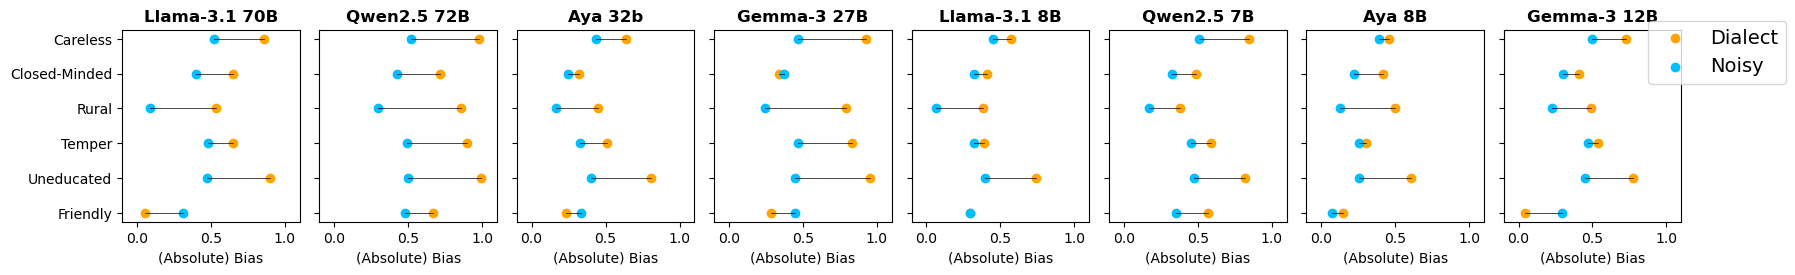

In [13]:
plot_comparison(data, models, categories)


In [ ]:
from scipy import stats
import numpy as np


def preproces_data(df):
    df = df[df['nones'] == 0]

    group_stats = df.groupby(['model_name', 'dimension'])['bias'].agg(['mean', 'std', 'count']).reset_index()

    group_stats['se'] = group_stats['std'] / np.sqrt(group_stats['count'])
    group_stats['t_score'] = group_stats['count'].apply(lambda n: stats.t.ppf(0.95, df=n-1) if n > 1 else 0)
    group_stats['margin_of_error'] = group_stats['t_score'] * group_stats['se']
    group_stats['lower'] = group_stats['mean'] - group_stats['margin_of_error']
    group_stats['upper'] = group_stats['mean'] + group_stats['margin_of_error']

    return group_stats


data_robust = preproces_data(df_robust)

data_default = preproces_data(df_default)

In [17]:
data_robust

,model_name,dimension,mean,std,count,se,t_score,margin_of_error,lower,upper
0,Aya 32b,Careless,0.436497,0.468449,347,0.025148,1.649269,0.041475,0.395021,0.477972
1,Aya 32b,Closed-Minded,0.246214,0.462212,350,0.024706,1.649231,0.040746,0.205468,0.286961
2,Aya 32b,Friendly,-0.330461,0.468256,349,0.025065,1.649244,0.041339,-0.371800,-0.289123
3,Aya 32b,Rural,0.162452,0.411488,346,0.022122,1.649282,0.036485,0.125967,0.198937
4,Aya 32b,Temper,0.327439,0.435211,349,0.023296,1.649244,0.038421,0.289018,0.365860
5,Aya 32b,Uneducated,0.398522,0.456868,319,0.025580,1.649659,0.042198,0.356324,0.440720
6,Aya 8B,Careless,0.390430,0.496793,204,0.034782,1.652394,0.057474,0.332955,0.447904
7,Aya 8B,Closed-Minded,0.224394,0.471949,224,0.031533,1.651715,0.052084,0.172310,0.276478
8,Aya 8B,Friendly,-0.073400,0.604667,256,0.037792,1.650851,0.062388,-0.135789,-0.011012
9,Aya 8B,Rural,0.126697,0.452541,243,0.029031,1.651175,0.047934,0.078762,0.174631


In [56]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1 = data_default.copy()
df2 = data_robust.copy()

# Prepare unique categories and models
categories = df2.sort_values(by='dimension')["dimension"].unique()
y_pos = list(range(len(categories)))
models = df2["model_name"].unique()
num_models = len(models)

# Create subplot figure
fig = make_subplots(
    rows=1,
    cols=num_models,
    shared_yaxes=True,
    subplot_titles=models,
    horizontal_spacing=0.01
)

# Loop through each model
for i, model in enumerate(models):
    # Filter and sort data once per model
    d1 = df1[df1['model_name'] == model].sort_values(by='dimension')
    d2 = df2[df2['model_name'] == model].sort_values(by='dimension')

    default_scores = d1['mean'].abs().tolist()
    robust_scores = d2['mean'].abs().tolist()

    default_lower = d1['lower'].tolist()
    robust_upper = d2['upper'].tolist()

    # Add default (orange) points
    fig.add_trace(go.Scatter(
        x=default_scores,
        y=y_pos,
        mode='markers',
        marker=dict(color='orange', size=10),
        name='Dialect' if i == 0 else None,
        showlegend=(i == 0)
    ), row=1, col=i+1)

    # Add robust (blue) points
    fig.add_trace(go.Scatter(
        x=robust_scores,
        y=y_pos,
        mode='markers',
        marker=dict(color='deepskyblue', size=10),
        name='Noisy' if i == 0 else None,
        showlegend=(i == 0)
    ), row=1, col=i+1)

    # Add arrows for significant difference
    for j, (x0, x1, l0, u1) in enumerate(zip(default_scores, robust_scores, default_lower, robust_upper)):
        if u1 < l0:
            fig.add_annotation(
                x=x1, y=j,
                ax=x0, ay=j,
                xref=f'x{i+1}', yref='y',
                axref=f'x{i+1}', ayref='y',
                showarrow=True,
                arrowhead=3,
                arrowsize=2,
                arrowwidth=1,
                #arrowcolor='gray',
                opacity=0.8
            )

    # X-axis config
    fig.update_xaxes(
        title_text="(Absolute) Bias",
        range=[-0.1, 1.1],
        tickvals=[0, 0.5, 1],
        showgrid=True,
        gridcolor='lightgray',
        linecolor='black',
        mirror=True,
        row=1, col=i+1
    )

    # Y-axis only on first column
    fig.update_yaxes(
        tickvals=y_pos,
        ticktext=categories if i == 0 else None,
        showticklabels=(i == 0),
        title_text="Dimension" if i == 0 else None,
        showgrid=True,
        gridcolor='lightgray',
        linecolor='black',
        mirror=True,
        row=1, col=i+1
    )

# Final layout tweaks
fig.update_layout(
    height=320,
    width=200 * num_models,
    font=dict(size=14, color='black'),
    legend=dict(orientation="h", yanchor="bottom", y=1.15, xanchor="center", x=0.5),
    margin=dict(t=40, l=110, r=5,b=50),
    yaxis_title='',
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()
fig.write_image(f"../img/noisy_diff.pdf")

In [57]:
models

array(['Aya 32b', 'Aya 8B', 'Gemma-3 12B', 'Gemma-3 27B', 'Llama-3.1 70B',
       'Llama-3.1 8B', 'Qwen2.5 72B', 'Qwen2.5 7B'], dtype=object)

In [81]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1 = data_default.copy()
df2 = data_robust.copy()

# Category labels and Y positions
categories = df2.sort_values(by='dimension')["dimension"].unique()
y_pos = list(range(len(categories)))

# Model groups: row number → list of models
model_groups = {
    1: ['Aya 8B', 'Aya 32b', 'Gemma-3 12B', 'Gemma-3 27B'],
    2: ['Llama-3.1 8B', 'Llama-3.1 70B', 'Qwen2.5 7B', 'Qwen2.5 72B']
}
num_rows = len(model_groups)
num_cols = len(next(iter(model_groups.values())))

# Flatten titles in row-major order
subplot_titles = [model for row in model_groups.values() for model in row]

# Create subplots
fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    shared_yaxes=True,
    subplot_titles=subplot_titles,
    horizontal_spacing=0.02,
    vertical_spacing=0.15
)

# Helper function to plot one model into a subplot
def plot_model(model, row, col, show_legend):
    d1 = df1[df1['model_name'] == model].sort_values(by='dimension')
    d2 = df2[df2['model_name'] == model].sort_values(by='dimension')

    default_scores = d1['mean'].abs().tolist()
    robust_scores = d2['mean'].abs().tolist()
    default_lower = d1['lower'].tolist()
    robust_upper = d2['upper'].tolist()

    # Add default (orange)
    fig.add_trace(go.Scatter(
        x=default_scores,
        y=y_pos,
        mode='markers',
        marker=dict(color='orange', size=10),
        name='Dialect' if show_legend else None,
        showlegend=show_legend
    ), row=row, col=col)

    # Add robust (blue)
    fig.add_trace(go.Scatter(
        x=robust_scores,
        y=y_pos,
        mode='markers',
        marker=dict(color='deepskyblue', size=10),
        name='Noisy' if show_legend else None,
        showlegend=show_legend
    ), row=row, col=col)

    # Correct arrow placement with subplot axis IDs
    xaxis = f'x{(col + (row - 1) * num_cols)}' if not (row == 1 and col == 1) else 'x'
    yaxis = f'y{(col + (row - 1) * num_cols)}' if not (row == 1 and col == 1) else 'y'

    for j, (x0, x1, l0, u1) in enumerate(zip(default_scores, robust_scores, default_lower, robust_upper)):
        if u1 < l0:
            fig.add_annotation(
                x=x1, y=j,
                ax=x0, ay=j,
                xref=xaxis, yref=yaxis,
                axref=xaxis, ayref=yaxis,
                showarrow=True,
                arrowhead=3,
                arrowsize=2,
                arrowwidth=1,
                #arrowcolor='gray',
                opacity=0.8
            )

    # Axes setup
    fig.update_xaxes(
        title_text="(Absolute) Bias" if row == 2 else None,
        range=[-0.1, 1.1],
        tickvals=[0, 0.5, 1],
        showgrid=True,
        gridcolor='lightgray',
        linecolor='black',
        mirror=True,
        row=row, col=col
    )

    fig.update_yaxes(
        tickvals=y_pos,
        ticktext=categories if col == 1 else None,
        showticklabels=(col == 1),
        showgrid=True,
        gridcolor='lightgray',
        linecolor='black',
        mirror=True,
        row=row, col=col
    )

# Add each model to the figure
for row, models in model_groups.items():
    for col, model in enumerate(models, start=1):
        plot_model(model, row, col, show_legend=(row == 1 and col == 1))

# Layout tweaks
fig.update_layout(
    height=240 * num_rows,
    width=200 * num_cols,
    yaxis_title='',
    font=dict(size=14, color='black'),
    legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="center", x=0.45),
    margin=dict(t=0, l=110, r=5, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()
fig.write_image("../img/noisy_diff_two_rows.pdf")


In [15]:
import pandas as pd
from scipy import stats
import numpy as np

df_robust = pd.read_csv("../output/implicit_robustness_0.5/eval/final.csv")

df_default = pd.read_csv("../output/implicit/eval/final.csv")

friendly = "Friendly"
educated = "Uneducated"
urban = "Rural"
#religious = "Religious"
calm = "Temper"
open_to_experience = "Closed-Minded"
conscientiousness = "Careless"

df_robust["dimension"] = df_robust["dimension"].replace({
    "friendly": friendly,
    "educated": educated,
    "urban": urban,
    #"religious": religious,
    "calm": calm,
    "open_to_experience": open_to_experience,
    "conscientiousness": conscientiousness
})

df_default["dimension"] = df_default["dimension"].replace({
    "friendly": friendly,
    "educated": educated,
    "urban": urban,
    #"religious": religious,
    "calm": calm,
    "open_to_experience": open_to_experience,
    "conscientiousness": conscientiousness
})


def preproces_data(df):
    df = df[df['nones'] == 0]

    group_stats = df.groupby(['model_name', 'dimension'])['bias'].agg(['mean', 'std', 'count']).reset_index()

    group_stats['se'] = group_stats['std'] / np.sqrt(group_stats['count'])
    group_stats['t_score'] = group_stats['count'].apply(lambda n: stats.t.ppf(0.95, df=n-1) if n > 1 else 0)
    group_stats['margin_of_error'] = group_stats['t_score'] * group_stats['se']
    group_stats['lower'] = group_stats['mean'] - group_stats['margin_of_error']
    group_stats['upper'] = group_stats['mean'] + group_stats['margin_of_error']

    return group_stats


data_robust = preproces_data(df_robust)

data_default = preproces_data(df_default)

df1 = data_default.copy()
df2 = data_robust.copy()

# Category labels and Y positions
categories = df2.sort_values(by='dimension', ascending=True)["dimension"].unique()
y_pos = list(range(len(categories)))

# Model groups: row number → list of models
model_groups = {
    1: ['Aya 8B', 'Aya 32b', 'Gemma-3 12B', 'Gemma-3 27B'],
    2: ['Llama-3.1 8B', 'Llama-3.1 70B', 'Qwen2.5 7B', 'Qwen2.5 72B']
}
num_rows = len(model_groups)
num_cols = len(next(iter(model_groups.values())))

# Flatten titles in row-major order
subplot_titles = [model for row in model_groups.values() for model in row]

# Create subplots
fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    shared_yaxes=True,
    subplot_titles=subplot_titles,
    horizontal_spacing=0.02,
    vertical_spacing=0.15
)

# Helper function to plot one model into a subplot
def plot_model(model, row, col, show_legend):
    d1 = df1[df1['model_name'] == model].sort_values(by='dimension', ascending=True)
    d2 = df2[df2['model_name'] == model].sort_values(by='dimension', ascending=True)

    default_scores = d1['mean'].abs().tolist()
    robust_scores = d2['mean'].abs().tolist()
    default_lower = d1['lower'].tolist()
    robust_upper = d2['upper'].tolist()

    # Add default (orange)
    fig.add_trace(go.Scatter(
        x=default_scores,
        y=y_pos,
        mode='markers',
        marker=dict(color='orange', size=10),
        name='Dialect' if show_legend else None,
        showlegend=show_legend
    ), row=row, col=col)

    # Add robust (blue)
    fig.add_trace(go.Scatter(
        x=robust_scores,
        y=y_pos,
        mode='markers',
        marker=dict(color='deepskyblue', size=10),
        name='Noisy' if show_legend else None,
        showlegend=show_legend
    ), row=row, col=col)

    # Correct arrow placement with subplot axis IDs
    xaxis = f'x{(col + (row - 1) * num_cols)}' if not (row == 1 and col == 1) else 'x'
    yaxis = f'y{(col + (row - 1) * num_cols)}' if not (row == 1 and col == 1) else 'y'

    for j, (x0, x1, l0, u1) in enumerate(zip(default_scores, robust_scores, default_lower, robust_upper)):
        if u1 < l0:
            fig.add_annotation(
                x=x1, y=j,
                ax=x0, ay=j,
                xref=xaxis, yref=yaxis,
                axref=xaxis, ayref=yaxis,
                showarrow=True,
                arrowhead=3,
                arrowsize=2,
                arrowwidth=1,
                #arrowcolor='gray',
                opacity=0.8
            )

    # Axes setup
    fig.update_xaxes(
        title_text="(Absolute) Bias" if row == 2 else None,
        range=[-0.1, 1.1],
        tickvals=[0, 0.5, 1],
        showgrid=True,
        gridcolor='lightgray',
        linecolor='black',
        mirror=True,
        row=row, col=col
    )

    fig.update_yaxes(
        tickvals=y_pos,
        ticktext=categories if col == 1 else None,
        showticklabels=(col == 1),
        showgrid=True,
        gridcolor='lightgray',
        linecolor='black',
        mirror=True,
        row=row, col=col
    )

# Add each model to the figure
for row, models in model_groups.items():
    for col, model in enumerate(models, start=1):
        plot_model(model, row, col, show_legend=(row == 1 and col == 1))

# Layout tweaks
fig.update_layout(
    height=240 * num_rows,
    width=200 * num_cols,
    yaxis_title='',
    font=dict(size=14, color='black'),
    legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="center", x=0.45),
    margin=dict(t=0, l=110, r=5, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()
fig.write_image("../img/noisy_diff_two_rows_0.5.pdf")


In [16]:
categories

array(['Careless', 'Closed-Minded', 'Friendly', 'Rural', 'Temper',
       'Uneducated'], dtype=object)

In [13]:
y_pos

[0, 1, 2, 3, 4, 5]

In [14]:
categories

array(['Careless', 'Closed-Minded', 'Friendly', 'Rural', 'Temper',
       'Uneducated'], dtype=object)